# Perceptrons
- perceptrons are the basic unit of a neural network
- perceptrons are a single layer of LTU(linear threshold units)
- here we implement the most basic perceptron using only Numpy functions and attributes
- The dataset used is a toydataset created by sebastian raschka

## Archietecture of the perceptron
- the perceptron classifies between 2 classes
- Thus, a single output neuron in the perceptron layer is required while there are two input neurons.

#### Functions learnt while creating this implementation
1. np.random.rand(array size):
- generates a random number between 0 and 1 from a uniform distribution
2. np.random.randn(array size):
- generates random numbers with a specific mean and stnadard deviation
3. np.random.seed(seed_val) and np.random.RandomState(seed_val):
- the random numbers/sequences generated by methods of the np.random module are not truly random i.e they are generated by providing a initial key value(seed) to a mathematical algorithm and thus these sequences can be repeated.
- truly random numbers can only be generated by using natural phenonmenons. eg- using atmospheric noise to generate numbers
- the random.seed(seed_val) method sets the seed value of the global numpy random number generator. This can be problamatic if some other library's function is also using the np.random functions simultaneously.
- while, the random.RandomState() method creates a local random number generator with the seed value as specified.
- thus for large projects it is adivsed to use random.RandomState() mehtod.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Preparing the dataset

(100, 3)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 8 70 82 28 63  0  5 50 81  4 23 65 76 60 24 42 77 38 56 75 35 88 19 29
 31 91 85  9 53 41 21 90 33 69 84 87 95 97 62 12 20 89 37 59  1 74 11 79
 14 54 16 26 51 45  6 98 30 44 72 43 15 94 18 13 22 10 58 71 64  3 40 34
 27 52  7 48 61 93 99 39  2 67 55 49 68 80 36 78 96 25 46 32 73 47 86 57
 83 17 92 66]


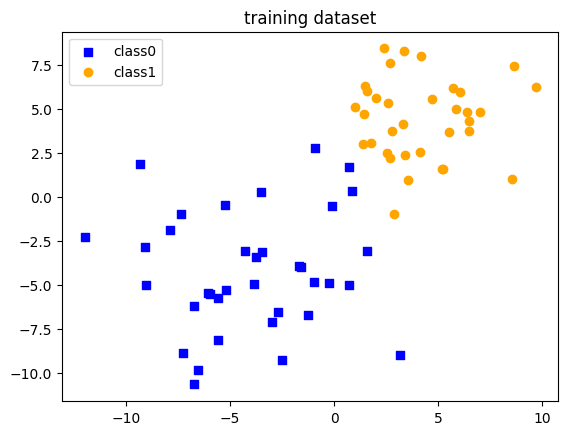

In [118]:
data=np.loadtxt("perceptron_toydataset.txt")
x,y=data[:,:2], data[:,2]
x=np.c_[x,np.ones((100,1))]
print(x.shape)

#shuffle index array corresponds to the indices of x and y
#every time this block is run the same shuffling will happen as the seed is same
shuffle_index=np.arange(0,x.shape[0],1)
print(shuffle_index)
shuffle_rng=np.random.RandomState(123) # a random number generator object
shuffle_rng.shuffle(shuffle_index)
print(shuffle_index)

#splitting in the ratio 7:3
# x and y are now shuffled randomly, ready to be split
x,y=x[shuffle_index],y[shuffle_index] 
x_train, y_train, x_test, y_test= x[:70],y[:70],x[70:100], y[70:100]

#normalising the training data
mu1,sig1=np.mean(x_train[:, 0]), np.std(x_train[:,0])
x_train[:,0]=(x_train[:,0]-mu1)*sig1
mu2,sig2=np.mean(x_train[:, 1]), np.std(x_train[:, 1])
x_train[:,1]=(x_train[:,1]-mu2)*sig2

#normalising the test data
x_test[:,0]=(x_test[:,0]-mu1)*sig1
x_test[:,1]=(x_test[:,1]-mu2)*sig2

plt.scatter(x_train[y_train==0, 0],x_train[y_train==0, 1], color='blue', marker='s', label="class0")
plt.scatter(x_train[y_train==1, 0],x_train[y_train==1, 1], color='orange', marker='o', label="class1")
plt.title("training dataset")
plt.legend()


## The perceptron class

In [124]:
class perceptron:
    def __init__(self, num_parameters): # we are only deciding the number of inputs to a single perceptron
        self.num_parameters=num_parameters
        self.weights=np.zeros((num_parameters+1,1), float)        
        
    def foward_pass(self, x):   #this functions calculates the prediction for a single training instance
        lin=np.matmul(x, self.weights)
        prediction=np.where(lin>0, 1,0)
        return prediction
        
    def backward_pass(self, x, y):  # y is the target value, x is a single training instance
        predictions=self.foward_pass(x)
        error=y-predictions
        return error
    
    def train(self, x_train,y_train, num_loops):
        for j in range(num_loops):
            for i in range(y_train.shape[0]):
                error= self.backward_pass(x_train[i].reshape(1,(self.num_parameters)+1), y_train[i])
                self.weights=self.weights+error*(x_train[i].reshape((self.num_parameters)+1,1))
        return self.weights
        
    def evaluate(self, x_test,y_test):
        predictions=self.foward_pass(x_test)
        correct=np.sum(predictions.reshape(y_test.shape)==y_test)
        return correct/y_test.shape[0]

## Evaluating the performance of the perceptron class

In [131]:
ptrn=perceptron(2)
weights=ptrn.train(x_train, y_train, 5)
print(weights)

print("on testing data", ptrn.evaluate(x_test,y_test))
print("on training data", ptrn.evaluate(x_train,y_train))

[[ 5.52043482]
 [ 1.77088963]
 [-7.        ]]
on testing data 1.0
on training data 1.0


## Plotting the results

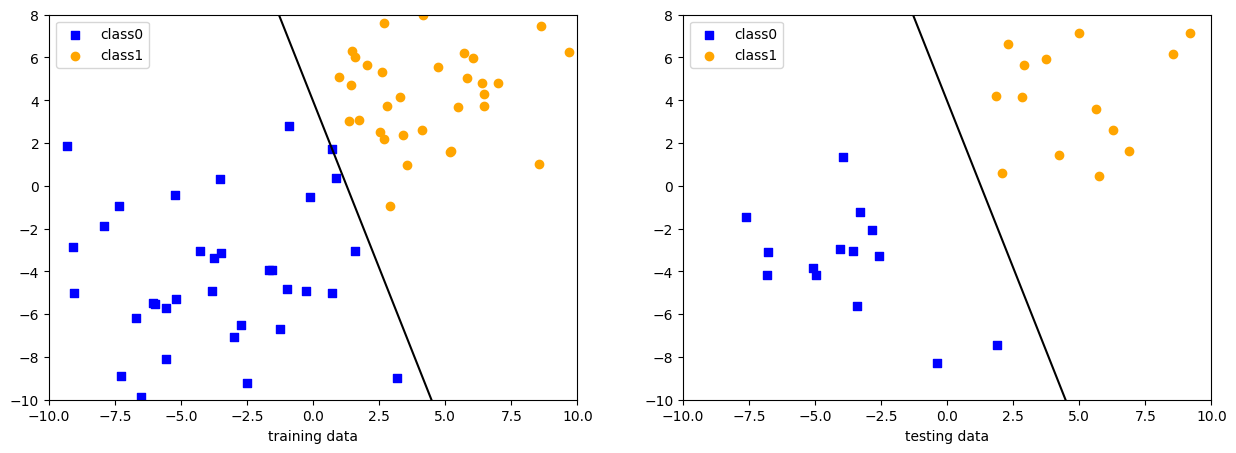

In [135]:
fig, ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_xlabel("training data")
ax[0].axis([-10,10,-10,8])
ax[1].set_xlabel("testing data")
ax[1].axis([-10,10,-10,8])

ax[0].scatter(x_train[y_train==0, 0],x_train[y_train==0, 1], color='blue', marker='s', label="class0")
ax[0].scatter(x_train[y_train==1, 0],x_train[y_train==1, 1], color='orange', marker='o', label="class1")
ax[0].legend()

ax[1].scatter(x_test[y_test==0, 0],x_test[y_test==0, 1], color='blue', marker='s', label="class0")
ax[1].scatter(x_test[y_test==1, 0],x_test[y_test==1, 1], color='orange', marker='o', label="class1")
ax[1].legend()

X=np.arange(-10,10,.5)
Y=-(X*ptrn.weights[0]+ptrn.weights[2])/ptrn.weights[1]

ax[0].plot(X,Y, color='black')
ax[1].plot(X,Y, color='black')

In [102]:
arr1=np.arange(0,10)
arr1=arr1.reshape(5,2)
np.c_[arr1,np.ones((5,1))]
arr1.reshape(2,5)
print(arr1)
arr1[arr1>5]=0
print(arr1)


arr1=np.array([1,0,1,0,1,0])
arr2=np.array([1,1,0,0,1,0])

print(np.sum(arr1==arr2))



[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[[0 1]
 [2 3]
 [4 5]
 [0 0]
 [0 0]]
4
